# 卷积神经网络中的数学运算

- 为了处理图像数据的训练学习，在神经网络中引入了卷积等数学计算用来处理图像数据，形成卷积神经网络。我先从卷积运算等数学概念开始卷积神经网络的学习。

## 卷积运算

- 卷积运算的示意图
    - 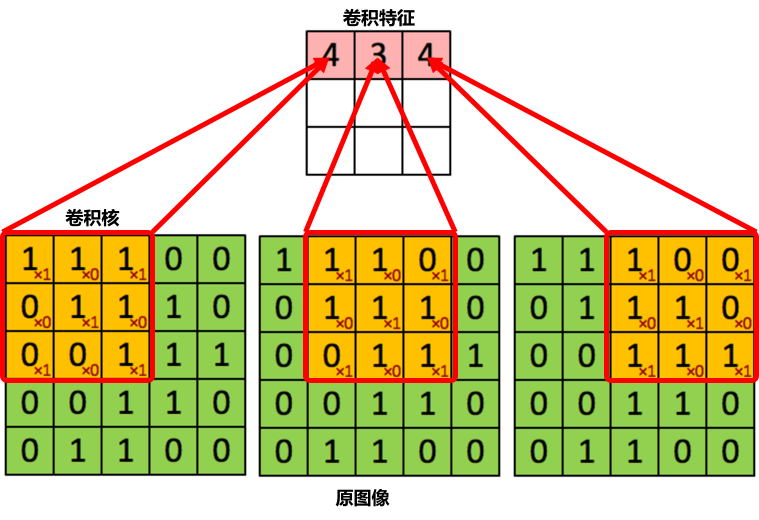

In [ ]:
N*N 3*3
1  0 1
0  1 0
1  0 1

### 卷积的基本概念

- 上图使用$5 \times 5$的网格表示一副图像，黄颜色填充的网格表示一个卷积核，卷积核的大小为$3 \times 3$。假设我们做步长为1的卷积操作，表示卷积核每次向右移动一个像素（当移动到边界时回到最左端并向下移动一个单位）。卷积核每个单元内有权重，上图的卷积核有9个权重。

- 	在卷积核移动的过程中将图片上的像素和卷积核的对应权重相乘，最后将所有乘积相加得到一个输出，该输出就是卷积特征。


- 从上面的描述中，我们重点理解三个概念：
    - 卷积核
    - 卷积操作
    - 卷积特征

#### 卷积核

- 上图使用$5 \times 5$的网格表示一副图像，黄颜色填充的网格表示一个卷积核，卷积核的大小为$3 \times 3$。假设我们做步长为1的卷积操作，表示卷积核每次向右移动一个像素（当移动到边界时回到最左端并向下移动一个单位）。卷积核每个单元内有权重，上图的卷积核有9个权重。


1. 卷积核本质是一个数值矩阵，由两个要素决定：
    - 矩阵的大小
    - 矩阵值
2. 卷积用来作为权重，卷积核就是一个权重矩阵。

#### 卷积操作

- 卷积操作就是加权求和操作，由两个要素确定：
    1. 步长（stride）：沿x轴方向的步长与沿y轴方向的步长，一般使用元组表示（x_stride, y_stride）,一般x，y方向的步长都保持一样。
    2. 加权求和：使用卷积核对应的权重与图像中对应像素相乘，并求和。（加权结合的对应方式可以相反对应：相当于把卷积核旋转180度，做对应的加权求和）


#### 卷积特征

- 卷积操作后得到的数值成为卷积特征，所以卷积特征构成新的图像。

### 补边（padding）

- 经过卷积操作得到的卷积特征图像，与原始图形大小是不一样的。为了使得原始图像与卷积特征图像大小一样，一般采用补边（Padding）的方法。

- 所谓补边就是在卷积操作前，对原始图像，周边增加几圈0元素，所以也称Zero-Padding；当然也可以补1等其他值。

### 卷积中的几个值的计算

#### 数据表示
- 我们约定图像高宽一样的

1. 核的：
    - 大小：K（使用Kernel的首字母表示）
    - 值（权重）：$k_{ij}$，$i$表示行，$j$表示列

2. 原图像：
    - 大小：O（使用Original的首字母表示）
    - 值（像素）：$x_{ij}^d$，$d$表示图像深度，$i$表示行，$j$表示列

3. 卷积特征图像：
    - 大小：N（使用New的首字母表示）
    - 值（卷积特征）：$y_{ij}^d$，需要的时候使用d表示深度，$i$表示行，$j$表示列

4. 图像的深度：
    - 大小：D（使用Depth的首字母表示）
    - 值：d表示深度序数

5. 激活函数表示：
    - $y = f(x)$

6. 卷积操作：
    步长：S（使用Stride的首字母表示）

#### 核心数据的计算公式

1. Padding长度的计算
    - 使用$P$表示Padding大小（假设步长$S = 1$）：
    - $P = (K - 1)/2$
    
    
- 如果考虑S的状况，情况稍微复杂点，下面都假设步长$S = 1$的情况。
    - 如果$S = 1$，要保持原始图像与卷积特征图像大小一样，则需要补边；
    - 如果补边要对称，则卷积核的大小K，需要取奇数（1，3，5，7）
    

2. 卷积特征层的大小
    - 就是卷积以后图像的大小（不考虑补边）：
    - $N = ( O - K ) / S + 1$


- 如果考虑Padding补边：
    -  $N = ( O  + 2P  - K ) / S + 1$
    
- 注意：为了简化问题，一般假设步长$S = 1$

3. 卷积特征值计算

    - $cov(i, j) = \sum \limits_{m=1} ^{K}  \sum \limits_{n=1} ^{K} w_{mn} x_{i+m, j+n} $
    
        - $cov(i, j) $是卷积特征图像的像素值。
        - $x_{i+m, j+n}$是原始图像的像素值。
        
        
- 如果考虑图像深度，上面公式还需要添加深度求和。
    - $cov(i, j) = \sum \limits _{d=1}^{D} \sum \limits_{m=1} ^{K}  \sum \limits_{n=1} ^{K} w_{mn} x_{d, i+m, j+n} $

4. 注意：
    - 这里的卷积运算与数学意义上的卷积运算，还是略有差异的。

### 数学意义上的卷积运算

#### 数学上的卷积公式
- $y(t) = \int _{-\infty}^{\infty} x(p) h(t-p) \mathrm{d} p  = x(t) \ast  h(t)$

    - 符号：$\ast$标记卷积

#### 数学卷积的意义

- 卷积是两个函数在某范围内相乘后求和的结果，其中$p$是积分变量，对$p$积分也是求和，$t$是使函数$h(-p)$位移的量。
- 由卷积得到的函数$x \ast h$一般要比$x$和$h$都光滑。特别当$x$为具有紧致集的光滑函数，$h$为局部可积时，它们的卷积$x \ast h$也是光滑函数。利用这一性质，对于任意的可积函数$y$，都可以简单地构造出一列逼近于$y$的光滑函数列$x \ast h$，这种方法称为函数的光滑化或正则化。

- 	卷积定理的应用在很多涉及积分变换、积分方程的应用中都有所体现。常见的一些重要的积分变换，例如：Mellin变换、Laplace变换、Fourier变换等都具有所谓的卷积性质（Convolution Property）。

#### 卷积的运算律
- 卷积算子都满足下列性质：
		A、交换律
		B、 结合律
		C、 分配律 
		D、数乘结合律 

#### 卷积的应用

- 统计学：
    - 加权的滑动平均是一种卷积。概率论中，两个统计独立变量X与Y的和的概率密度函数是X与Y的概率密度函数的卷积。
- 声学：
    - 回声可以用源声与一个反映各种反射效应的函数的卷积表示。
- 电子工程与信号处理：
    - 任一个线性系统的输出都可以通过将输入信号与系统函数（系统的冲激响应）做卷积获得。
- 物理学：
    - 任何一个线性系统（符合叠加原理）都存在卷积。


- 图像处理：
    - 用一个模板（卷积核）和一幅图像进行卷积，
    - 对于图像上的一个点，让模板的原点和该点重合，然后模板上的点和图像上对应的点相乘，然后各点的积相加，就得到了该点的卷积值。对图像上的每个点都这样处理。
    - 卷积是一种积分运算，用来求两个曲线重叠区域面积。可以看作加权求和，可以用来消除噪声、特征增强。 

### 图像处理中的卷积公式

- $x \ast  h(i, j) = \sum \limits_{m=1} ^{K}  \sum \limits_{n=1} ^{K} x(m, n) h(i-m, j-n)$

- 注意：
    - 上面使用的是减法，这点是与我们上面的图像卷积运算是有差异。
    - 下面是示意图：
    - 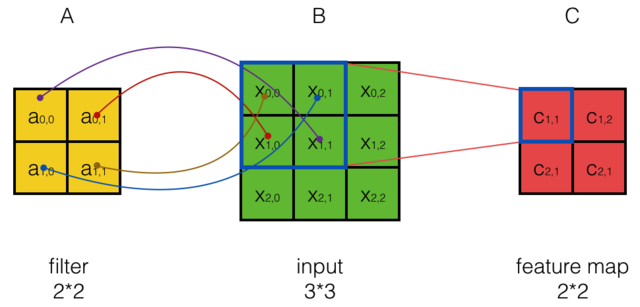

- 为了区分数学中的卷积和卷积神经网络中的『卷积』的区别，我们把卷积神经网络中的『卷积』操作叫做互相关(cross-correlation)操作。
    - 卷积和互相关操作是可以转化的：把卷积核旋转180度。


### 理解池化层

- 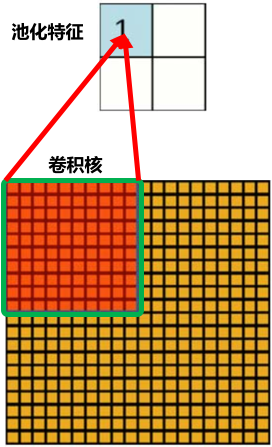

- 池化也称下采样，其操作与卷基的操作基本相同，只不过下采样的卷积核为只取对应位置的最大值、平均值等（最大池化、平均池化）
- 经过下采样的特征称为池化特征。


- 一般使用$2 \times 2$的池化层，并采用与核一样大小的步长，得到的图像大小为原始图像大小的一般。
    - 所以使用池化层降维。

- 池化层的值计算方式
    1. 最大值（Max  Pooling）
    2. 平均值（Mean Pooling）


# 卷积神经网络

- 卷积神经网络就是把前馈神经网络的加权求和运算替换成卷积运算与池化运算。
    - 卷积运算用来做图像的卷积特征抽取
    - 池化运算是用来降维。
- 卷积神经网络中，一般卷积层与池化层结合使用，下面是卷积神经网络的典型结构：
    - 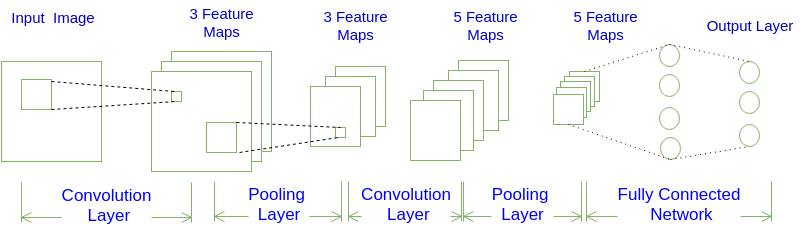

- 卷积神经最后会使用全连接层（前馈神经网络的主要核心层）。
    - 全连接层主要用来做分类训练；
    - 卷积层用来做图像卷积特征抽取；
    - 池化层用来降维；
    - 后面还会使用dropout层来降低数据运算（还能解决其他一些问题，比如：梯度消失等问题）

## 卷积层

### 卷积层的意义

- 卷积测的意义，与全连接层比较而言特别明显。

1. 参数数量太多
    - 考虑一个输入1000*1000像素的图片(一百万像素，现在已经不能算大图了)，输入层有1000*1000=100万节点。假设第一个隐藏层有100个节点(这个数量并不多)，那么仅这一层就有(1000*1000+1)*100=1亿参数，这实在是太多了！我们看到图像只扩大一点，参数数量就会多很多，因此它的扩展性很差。



2. 没有利用像素之间的位置信息 
    - 对于图像识别任务来说，每个像素和其周围像素的联系是比较紧密的，和离得很远的像素的联系可能就很小了。如果一个神经元和上一层所有神经元相连，那么就相当于对于一个像素来说，把图像的所有像素都等同看待，这不符合前面的假设。当我们完成每个连接权重的学习之后，最终可能会发现，有大量的权重，它们的值都是很小的(也就是这些连接其实无关紧要)。努力学习大量并不重要的权重，这样的学习必将是非常低效的。


3. 网络层数限制
    - 我们知道网络层数越多其表达能力越强，但是通过梯度下降方法训练深度全连接神经网络很困难，因为全连接神经网络的梯度很难传递超过3层。因此，我们不可能得到一个很深的全连接神经网络，也就限制了它的能力。

### 卷积层的训练原理

- 所谓卷积核，决定了从原始图像中抽取什么样的特征，这个卷积核就是我们需要反复训练，找到一个合适的核，得到有助于我们分类的图像特征。

- 	和全连接神经网络相比，卷积神经网络的训练要复杂一些。但训练的原理是一样的：利用链式求导计算损失函数对每个权重的偏导数（梯度），然后根据梯度下降公式更新权重。训练算法依然是反向传播算法。步骤如下：

1. 前向计算每个神经元的输出值$a_j$（表示网络的第$j$个神经元）
    - 使用卷积核计算：$cov(i, j) = f(\sum \limits_{m=1} ^{K}  \sum \limits_{n=1} ^{K} w_{mn} x_{i+m, j+n} )$
    - 上式包含偏置项。

2. 反向计算每个神经元的误差项$\delta _ j$。
    - $\delta_{ij}^{l-1} = \sum \limits _{m=1} \sum \limits _{n=1} w_{m,n}^{l} \delta_{i+m,j+n} ^{l} f^{\prime}(\text{net}^{l})$
        - 本质是误差项的反向卷积。
    - 示意图如下：
        - 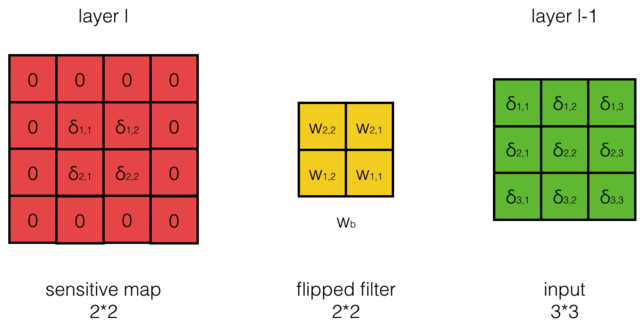

3. 计算卷积核$w_{ij}$的梯度（$w_{ij}$表示卷积核的权重值）
    - $\nabla_{i,j} =  \sum \limits _{m=1} \sum \limits _{n=1} \delta_{m,n} \ \alpha_{i+m, j+n}$
    - 示意图：
        - 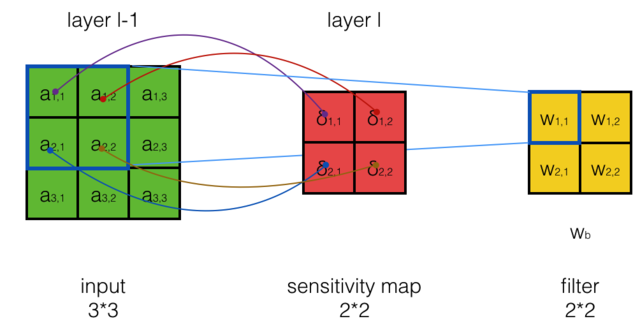

## 池化层

- 误差项传递与上面一样，但是计算方式不同，下面分成最大池化与均值池化考虑：

### 最大池化的误差项传递

- $\delta_{1,1}^{l-1} =\delta_{1,1}^{l} $
- 其他项都为0

### 均值池化的误差项传递

- $\delta_{i,j} ^ {l-1}= \dfrac{1}{4} \delta_{i,j}^{l}$